In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

In [20]:
column_names = ['Tweet ID', 'entity', 'sentiment', 'content']
df=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv",header=None,names =column_names)
df

,Tweet ID,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [21]:
df.isnull().sum()

Tweet ID       0
entity         0
sentiment      0
content      686
dtype: int64

In [22]:
df.dropna(subset=['content'], inplace=True)


In [23]:
import re #Regular expressions

df["lower"]=df.content.str.lower() #lowercase
df["lower"]=[str(data) for data in df.lower] #converting all to string
df["lower"]=df.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [24]:
df

,Tweet ID,entity,sentiment,content,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...


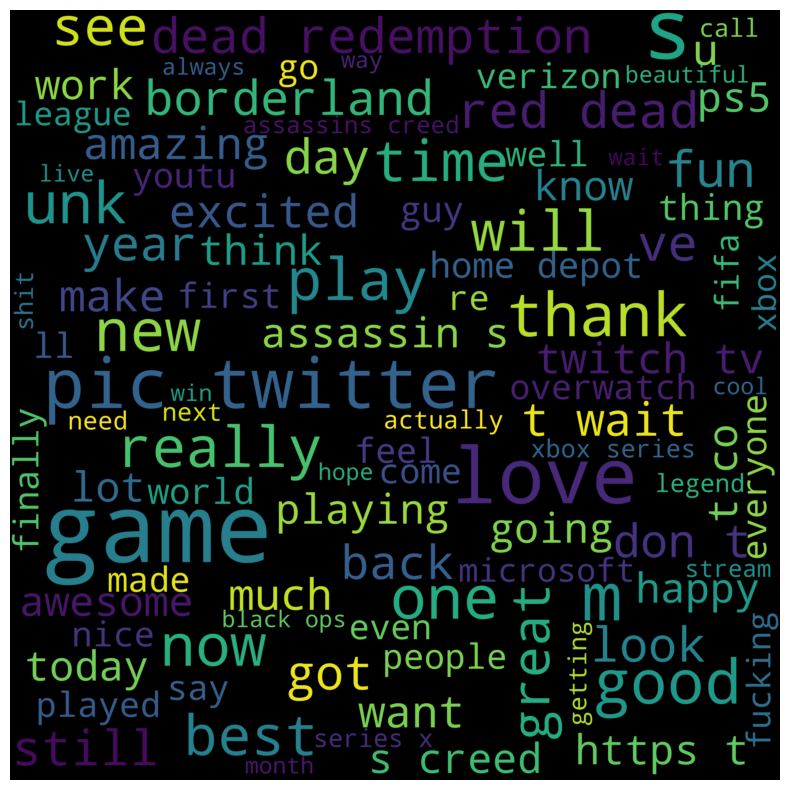

In [25]:
from wordcloud import WordCloud #Word visualization
word_cloud_text = ''.join(df[df["sentiment"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
plot1=df.groupby(by=["entity","sentiment"]).count().reset_index()
plot1.head()

,entity,sentiment,Tweet ID,content,lower
0,Amazon,Irrelevant,186,186,186
1,Amazon,Negative,575,575,575
2,Amazon,Neutral,1207,1207,1207
3,Amazon,Positive,308,308,308
4,ApexLegends,Irrelevant,192,192,192


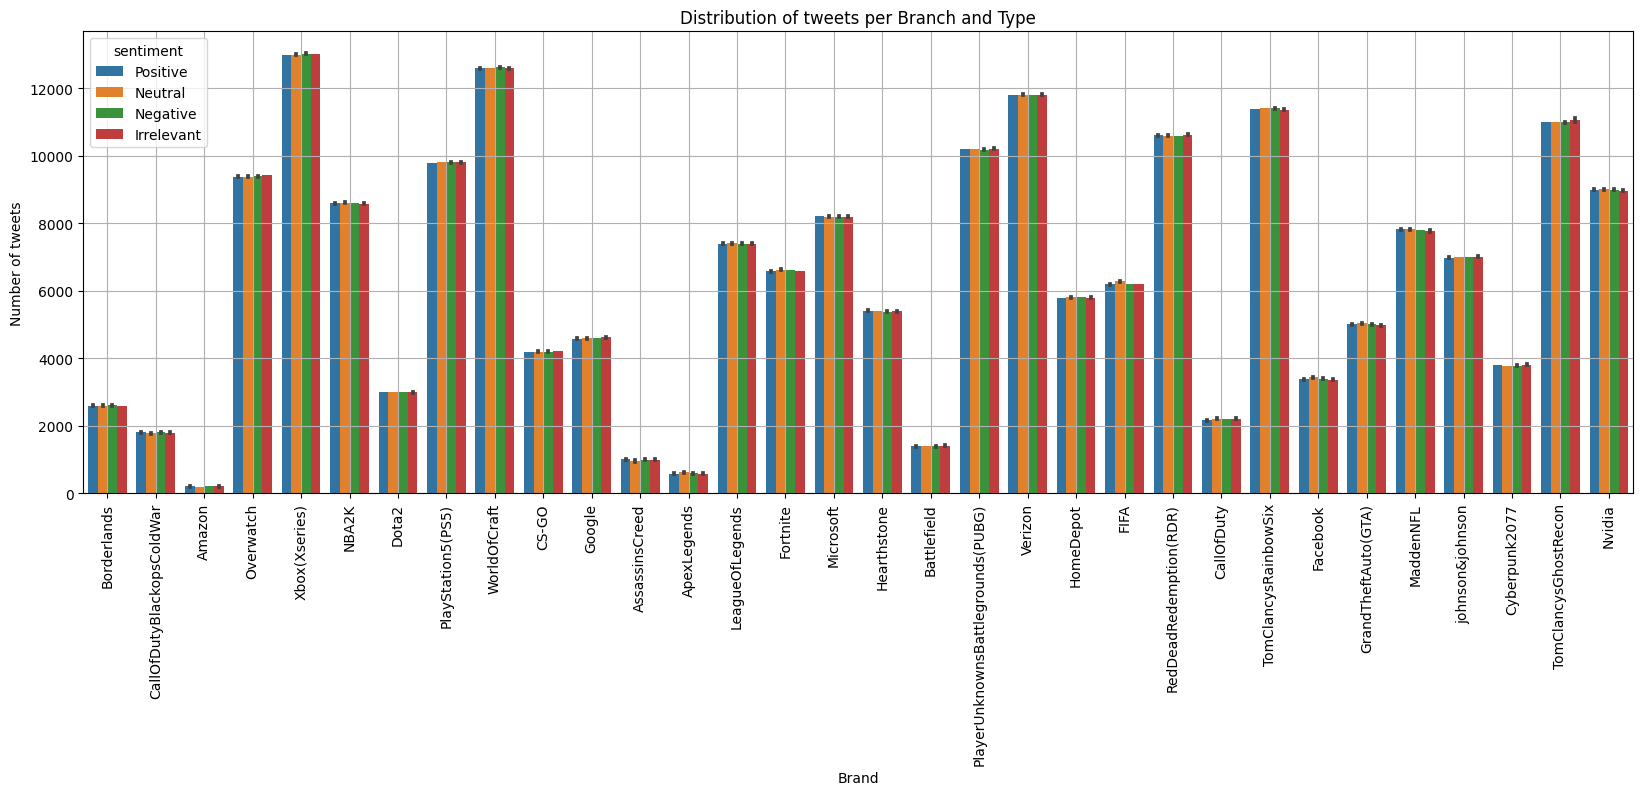

In [27]:
plt.figure(figsize=(20,6))
sns.barplot(data=df,x="entity",y="Tweet ID",hue="sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [28]:
# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet
df['compound'] = df["content"].apply(lambda x: sid.polarity_scores(x)['compound'])


In [29]:
df

,Tweet ID,entity,sentiment,content,lower,compound
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,-0.6908
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,-0.6908
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,-0.6908
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,-0.6908
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,-0.6908
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...,0.0772
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...,-0.2960
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...,-0.2960
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...,0.0772


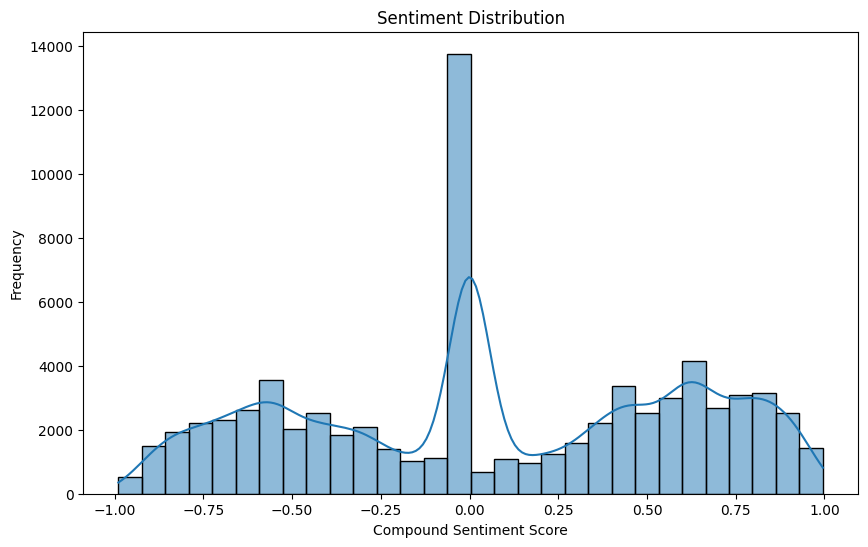

In [30]:
# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

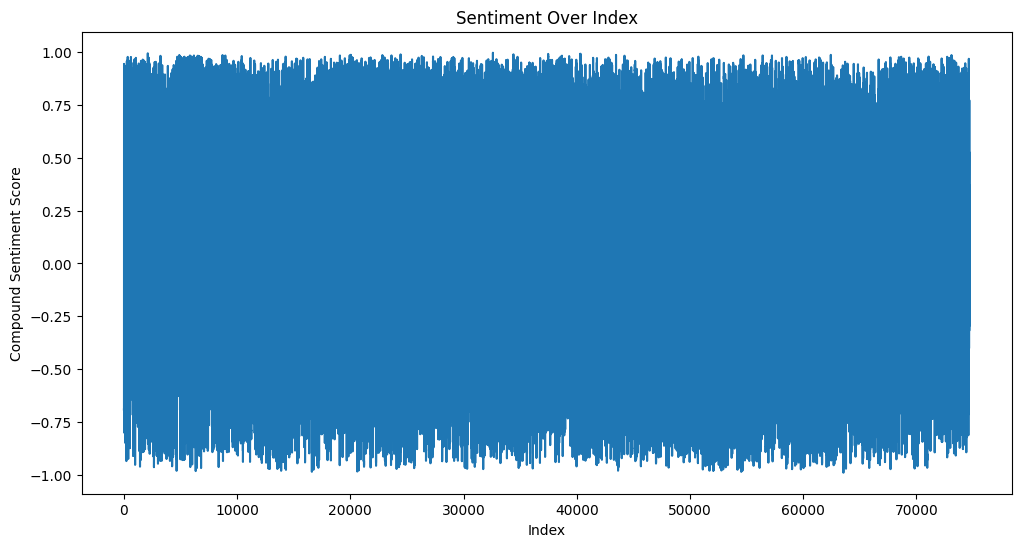

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='compound', data=df)
plt.title('Sentiment Over Index')
plt.xlabel('Index')
plt.ylabel('Compound Sentiment Score')
plt.show()